In [1]:
psrname='J1909-3744'

In [2]:
script_dir='/media/root1/3PAR/sdandapat/work_dir'
work_dir='/media/root1/3PAR/sdandapat/'

In [3]:
spna_dir=work_dir+'posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
spnta_dir=work_dir+'posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [4]:
spnta_dir

'/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/J1909-3744/results/'

In [5]:
import os
with os.scandir(spna_dir) as entries:
        for entry in entries:
            spna_dir=spna_dir+entry.name+'/ptmcmc/'

In [6]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_dir)
from diff_chain import  Diff_chain_shift

2023-04-16 05:28:53.659660: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:28:53.705185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:28:53.706881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 05:28:54.427802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)

In [8]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt',usecols=(lspn-1,lspn-2,lspn-3,lspn-4,-3))

In [9]:
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)

In [10]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(lspnt-4,lspnt-3,lspnt-2,lspnt-1,-1))

In [11]:
epta_spna_1.T[2]=epta_spna_1.T[2]+1.64

In [12]:
spna_arr=epta_spna_1.T[0:4];spnta_arr=epta_spnta_1.T[0:4]
spna_arr_red=spna_arr[0:2];spnta_arr_red=spnta_arr[0:2]
spna_arr_dm=spna_arr[2:4];spnta_arr_dm=spnta_arr[2:4]

In [13]:
loglike_spna=epta_spna_1.T[-1];loglike_spnta=epta_spnta_1.T[-1]

# Tension Considering red+dm

In [14]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=loglike_spna,names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=loglike_spnta,names = names,labels=labels,label='SPNTA \n'+psrname)

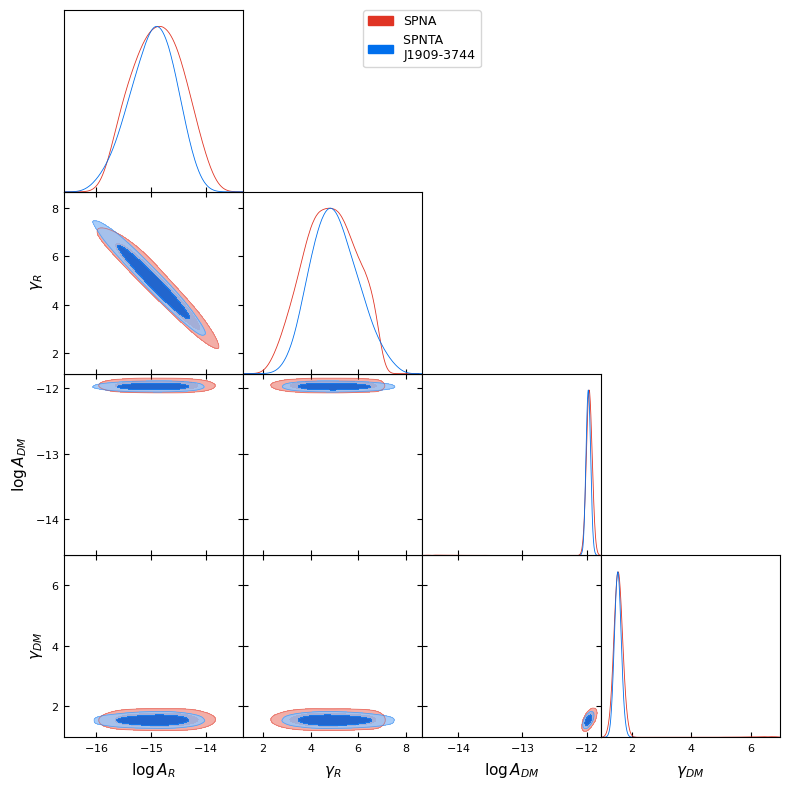

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA+INPTA_All.png',dpi=300)
plt.show()

In [16]:
# %matplotlib inline
# diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

In [17]:
# %matplotlib inline
# g = plots.get_subplot_plotter()
# #nsig=utilities.from_confidence_to_sigma(shift_probability)
# #getdist.plots.GetDistPlotSettings()
# g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
#                         str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
# #g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
# plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [18]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

spna_red=MCSamples(samples=np.array(spna_arr_red).transpose(),loglikes=loglike_spna,names=names_r,labels=labels_r,label='SPNA')
spnta_red=MCSamples(samples=np.array(spnta_arr_red).transpose(),loglikes=loglike_spnta,names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

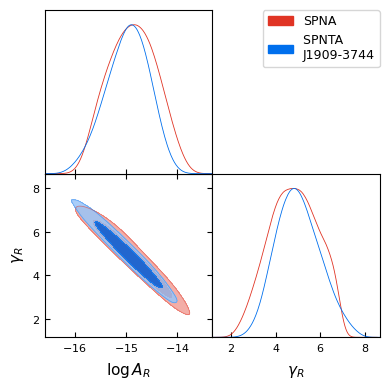

In [19]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_red,spnta_red], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_red.png',dpi=300)
plt.show()

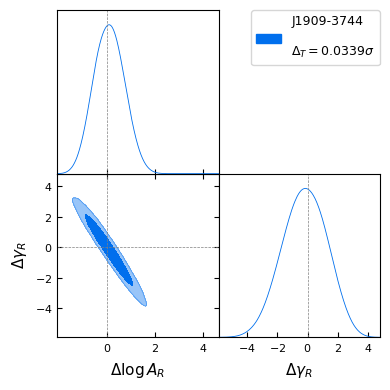

In [20]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(spna_red,spnta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_r, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_red.png',dpi=300)

# Tension considering dm noise only

In [21]:
names_dm = ['gamma_DM','logA_DM']
labels_dm=['\gamma_{DM}','\log A_{DM}']
del_dm=['delta_gamma_DM','delta_logA_DM']

In [22]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=loglike_spna,names=names_dm,labels=labels_dm,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=loglike_spnta,names = names_dm,labels=labels_dm,label='SPNTA \n'+psrname)

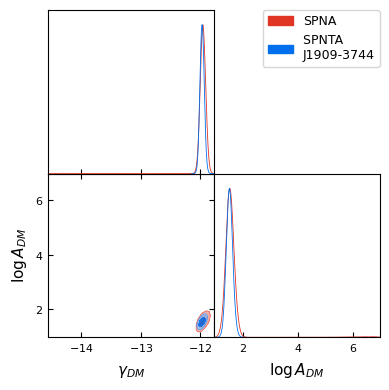

In [23]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_dm.png',dpi=300)
plt.show()

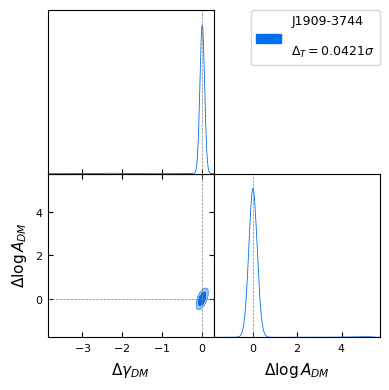

In [24]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)

In [25]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_dm[0], param2=del_dm[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' vs '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.3f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    #plt.savefig('diff_'+psrname+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

(<getdist.mcsamples.MCSamples at 0x7f0728473be0>, 0.03354177088544273)

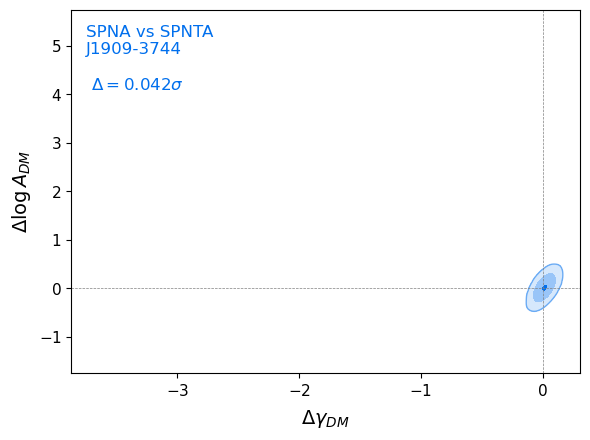

In [26]:
plot_diff_chain(spna_dm,spnta_dm)